# Analisis Data Mobil Bekas di Arab Saudi

## Pemahaman Bisnis

### Konteks

Pasar mobil bekas di Arab Saudi adalah sektor penting dalam industri otomotif negara tersebut. Banyak pembeli dan penjual menghadapi kesulitan dalam menentukan harga yang wajar untuk kendaraan bekas karena berbagai faktor yang mempengaruhi nilai mobil. Hal ini menyebabkan inefisiensi dalam pasar, yang berpotensi mengakibatkan kerugian finansial bagi penjual dan ketidakpercayaan di antara pembeli.

### Pernyataan Masalah

Dealer mobil bekas dan penjual individu di Arab Saudi menghadapi tantangan dalam menentukan harga mobil bekas secara akurat. Hal ini mengakibatkan:
1. Potensi kehilangan pendapatan karena harga yang terlalu rendah
2. Waktu penjualan yang lebih lama karena harga yang terlalu tinggi
3. Berkurangnya kepercayaan dan kepuasan pelanggan

### Stakeholder

- Dealer mobil bekas
- Penjual mobil individu
- Calon pembeli mobil
- Platform pasar mobil online (misalnya, [syarah.com](https://syarah.com/]))

### Goal

1. Mengembangkan model machine learning untuk memprediksi harga mobil bekas dengan margin kesalahan kurang dari 10%
2. Mengidentifikasi faktor-faktor kunci yang mempengaruhi harga mobil bekas di Arab Saudi
3. Menyediakan alat bagi stakeholder untuk memperkirakan nilai pasar yang wajar untuk mobil bekas

### Pendekatan Analitis

Kita akan menggunakan model regresi untuk memprediksi harga mobil bekas berdasarkan berbagai fitur seperti merek, model, tahun, jarak tempuh, dan atribut lainnya. Proyek ini akan melibatkan:
1. Pembersihan data dan preprocessing
2. Analisis eksploratori data untuk memahami hubungan antar fitur
3. Rekayasa fitur untuk menciptakan input yang relevan bagi model
4. Pemilihan dan pelatihan model
5. Evaluasi dan optimisasi model

### Metrik Evaluasi

Metrik utama:
- Root Mean Squared Error (RMSE)
- Mean Absolute Percentage Error (MAPE)

Metrik sekunder:
- R-squared (R²)
- Mean Absolute Error (MAE)

Kita akan fokus pada MAPE sebagai metrik utama karena memberikan persentase kesalahan yang mudah diinterpretasikan dalam konteks harga mobil.

### Dampak yang Diharapkan

- Penentuan harga mobil bekas yang lebih akurat dan konsisten
- Waktu penjualan yang lebih singkat bagi penjual
- Peningkatan kepercayaan dan transparansi di pasar mobil bekas
- Potensi peningkatan efisiensi pasar dan volume transaksi

Dengan mengatasi masalah bisnis ini, kita bertujuan untuk menciptakan nilai bagi semua pemangku kepentingan di pasar mobil bekas Arab Saudi, yang mengarah pada pasar yang lebih efisien dan terpercaya.

## Memuat dan Memeriksa Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data_saudi_used_cars.csv')

print(df.head())

print(df.info())

print(df.describe())

          Type          Region        Make  Gear_Type       Origin    Options  \
0      Corolla            Abha      Toyota     Manual        Saudi   Standard   
1        Yukon          Riyadh         GMC  Automatic        Saudi       Full   
2  Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic       Full   
3       Optima  Hafar Al-Batin         Kia  Automatic        Saudi  Semi Full   
4           FJ          Riyadh      Toyota  Automatic        Saudi       Full   

   Year  Engine_Size  Mileage  Negotiable   Price  
0  2013          1.4   421000        True       0  
1  2014          8.0    80000       False  120000  
2  2015          5.0   140000       False  260000  
3  2015          2.4   220000       False   42000  
4  2020          4.0    49000        True       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type 

## Analisis Eksploratori Data (EDA)

### 1. Visualisasi distribusi variabel target (Price)

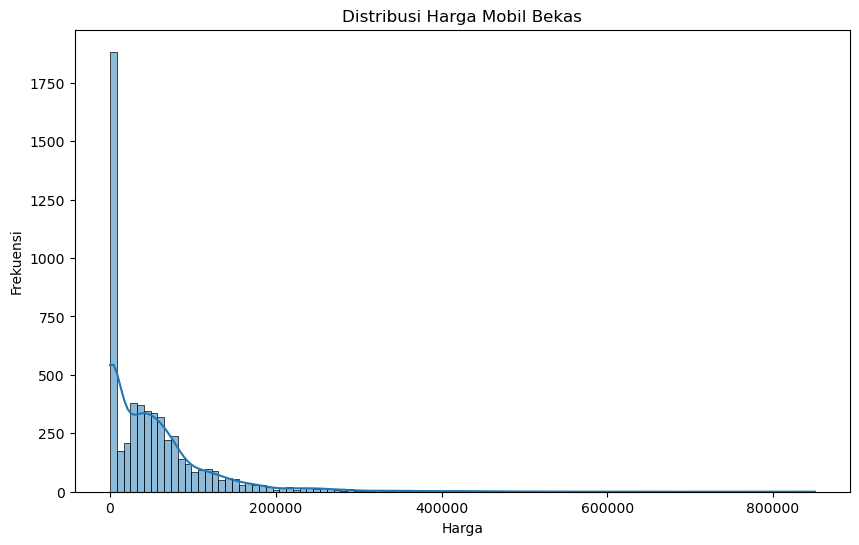

In [2]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribusi Harga Mobil Bekas')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

### 2. Analisis korelasi antar variabel numerik

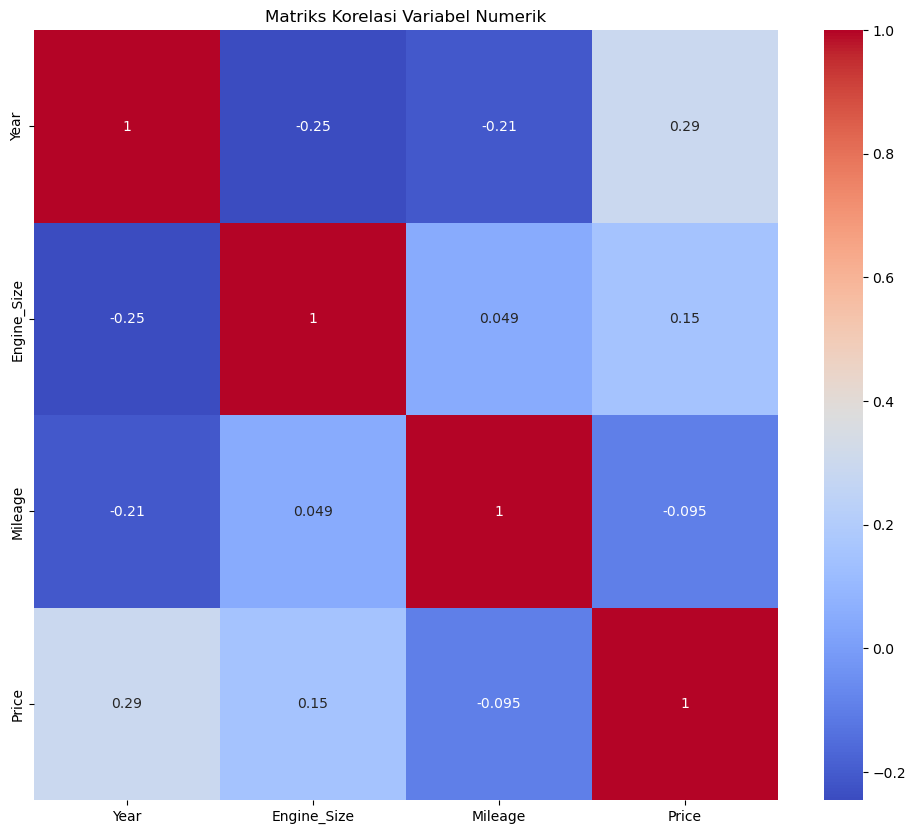

In [3]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

### 3. Visualisasi hubungan antara fitur kategorikal dengan harga

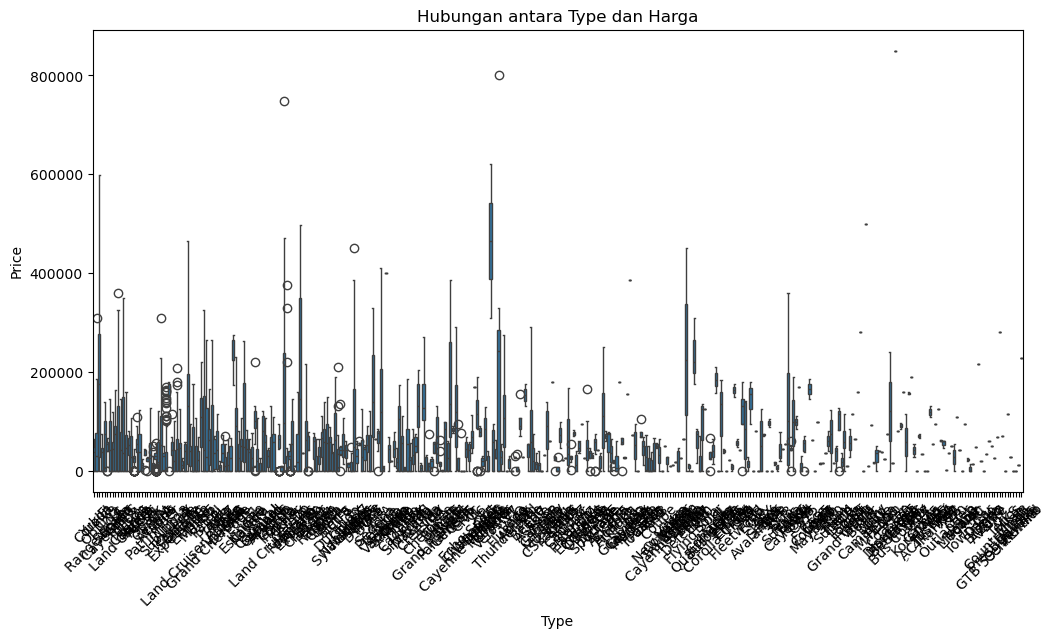

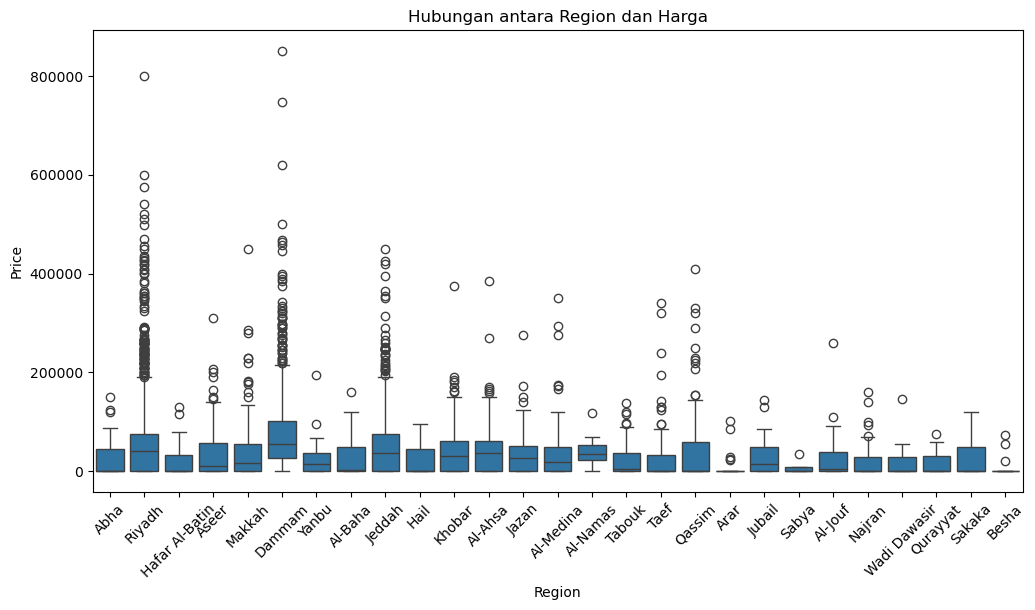

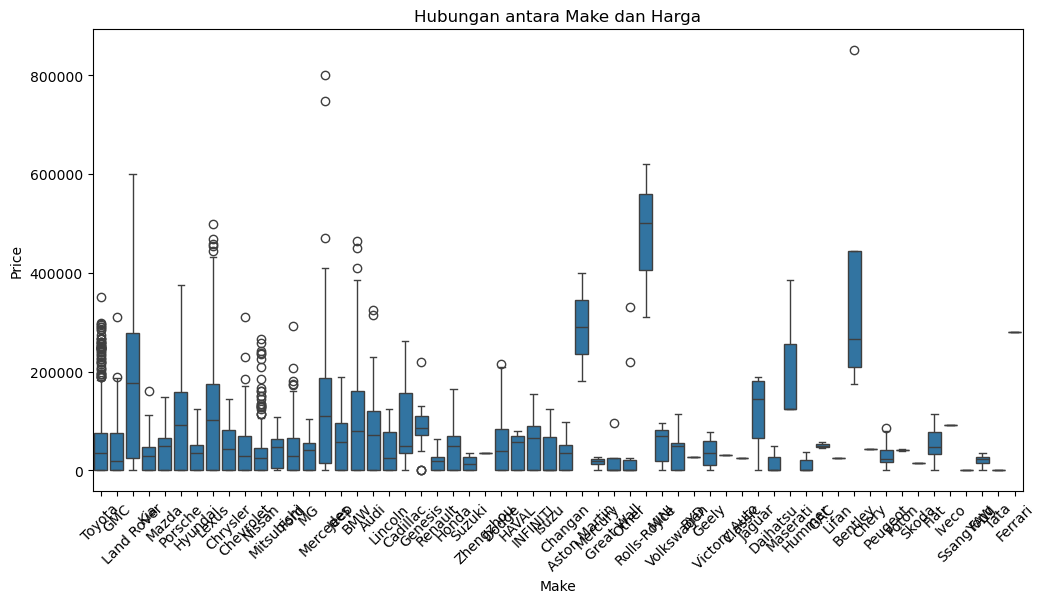

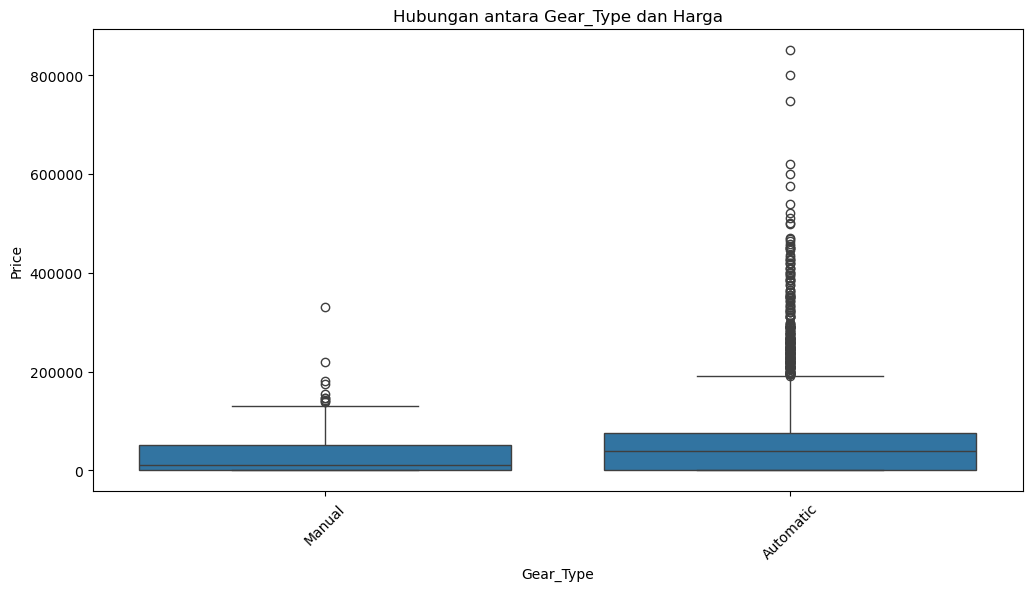

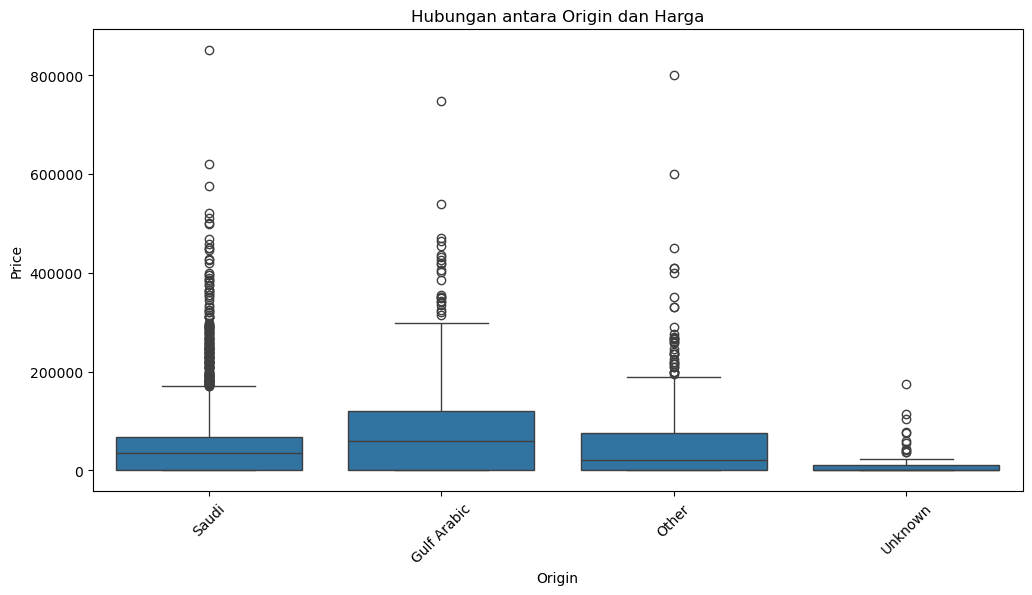

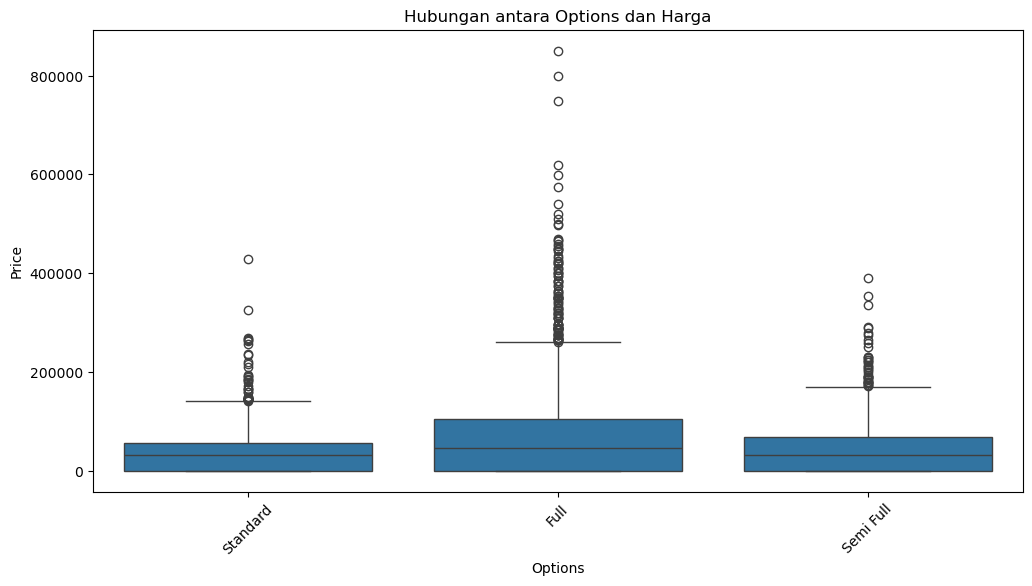

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  plt.figure(figsize=(12,6))
  sns.boxplot(x=col, y='Price', data=df)
  plt.title(f'Hubungan antara {col} dan Harga')
  plt.xticks(rotation=45)
  plt.show()

### 4. Analisis nilai yang hilang

In [5]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values[missing_values > 0])

Jumlah nilai yang hilang per kolom:
Series([], dtype: int64)


### 5. Identifikasi outlier pada variabel numerik

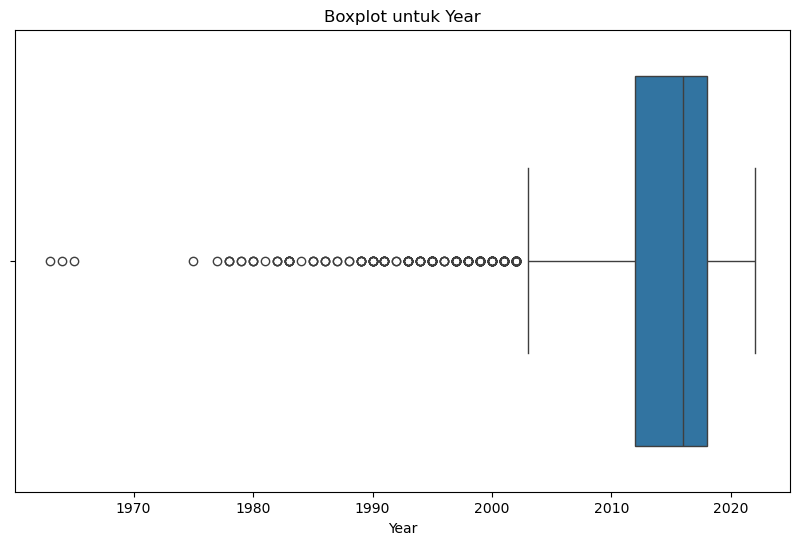

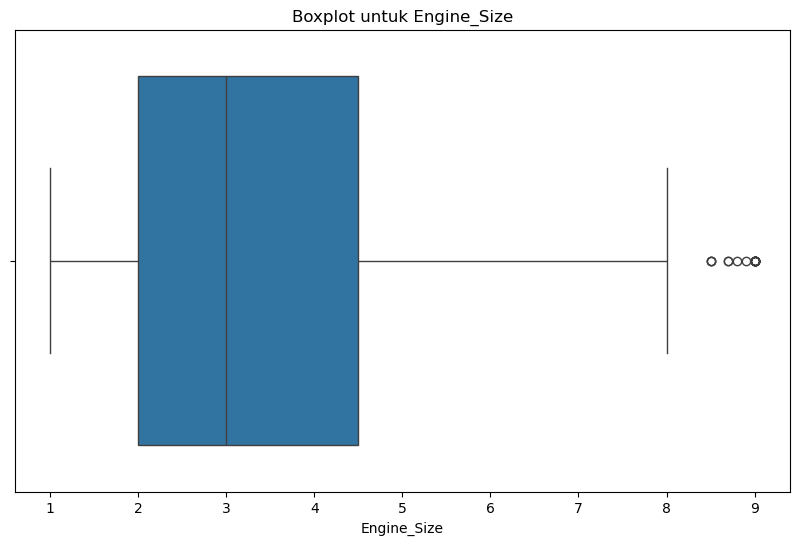

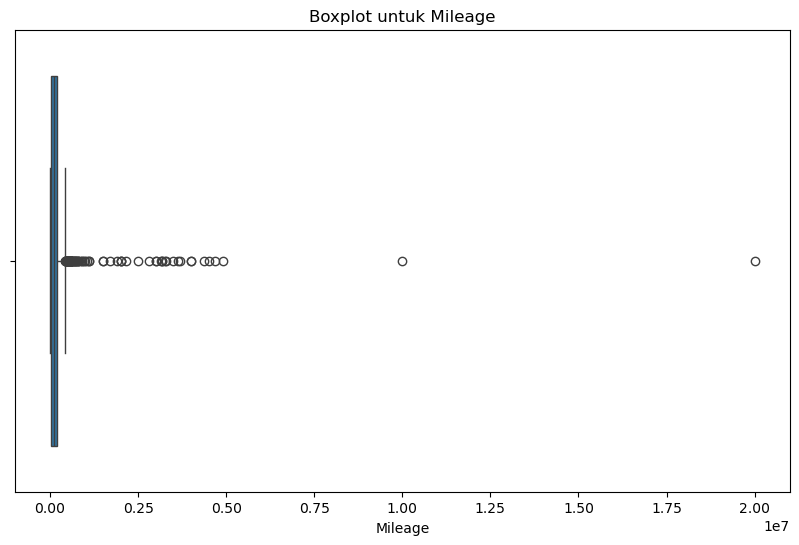

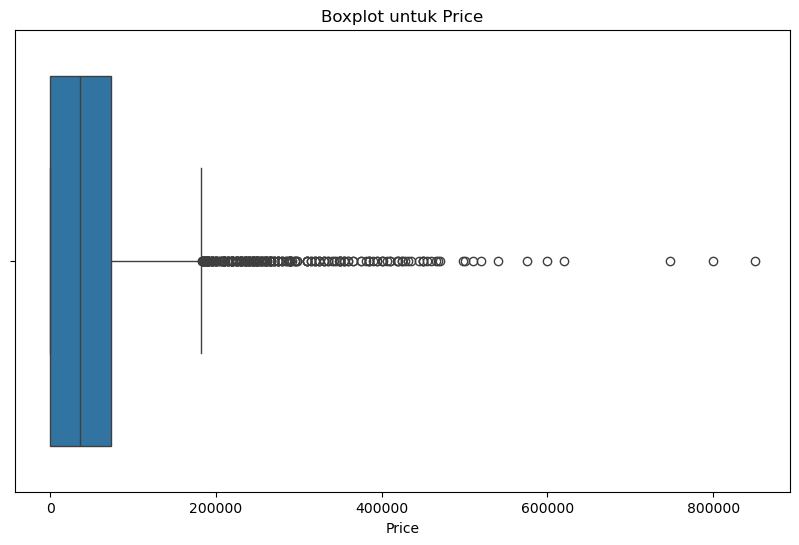

In [6]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot untuk {col}')
  plt.show()

## Pra-pemrosesan Data

### 1. Menangani Nilai yang Hilang

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values[missing_values > 0])

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].median(), inplace=True)

print("\nNilai yang hilang setelah penanganan:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
Series([], dtype: int64)

Nilai yang hilang setelah penanganan:
Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64


### 2. Menangani Outlier

In [8]:
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = df[column].clip(lower_bound, upper_bound)
  return df

for col in numeric_columns:
  df = handle_outliers(df, col)

print("Outlier telah ditangani.")

Outlier telah ditangani.


### 3. Encoding Variabel Kategorikal

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Jumlah kolom setelah encoding:", df_encoded.shape[1])

Jumlah kolom setelah encoding: 440


### 4. Normalisasi Fitur Numerik

In [10]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Fitur telah dinormalisasi.")

Fitur telah dinormalisasi.


### 5. Pembagian Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Ukuran set pelatihan:", X_train.shape)
print("Ukuran set pengujian:", X_test.shape)

Ukuran set pelatihan: (4499, 439)
Ukuran set pengujian: (1125, 439)
